# Лаб1 Мускатин Игорь КСм-21-1 

## 1. Скачать сырые данные и обозначить возможную цель

Для решения этой задачи воспользуемся популярным Kaggle - ресурсом, на котором хранится множество разнообразных датасетов.

Целью работы поставим цель предсказание цены автомобиля на аукционе Dubizzle.

Набор данныйх был взят с ресурса Kaggle: https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data

In [1]:
# pandas — программная библиотека на языке Python для обработки и анализа данных.
# подключаем для работы с данными и их обработки 
import pandas as pd


# seaborn — это библиотека для создания статистических графиков на Python
# она основывается на matplotlib и тесно взаимодействует со структурами данных pandas
# подключаем для перевода наших данных в графическое представление
import seaborn as sns 

sns.set() # установливаем стили для графиков - seaborn

import warnings # инструмент контроля предупреждений
warnings.simplefilter('ignore') # отключаем не серьезные предупреждения

Загружаем данные

In [2]:
raw_data = pd.read_csv('CarSalesData.csv') # подгружаем данные в таблицу
raw_data

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,"215,000",105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,"90,000",55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,"679,000",100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,"18,900",140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022


## 2. Preprocessing

Проводим подготовку данных: т.к. мы рассматриваем своей главной целью предсказание цен автомобилей на последующих аукционах, то выделим основные показатели, влияющие на цену.
1. Марка/модель автомобиля - как правило, производители автомобилей имеют сильную разницу в своей ценовой категории, например, как правило mercedes-benz всегда будет дороже любой машины компании renault.
2. Важным фактором является пробег автомабиля, говорящий о перспективном износе агрегатов.
3. Немаловажным фактором можно назвать год выпуска автомабиля.
4. Также важными факторами будут состояние автомобиля как касметическое (body_condition), так и состояние его механических агрегатов (mechanical_condition).
5. С другой стороны, как не особо влияющими факторами в представленной выборке можно предположить следующие факторы:
    5.1. региональную спецификацию транспортного средства;
    5.2. эмират, в котором продают данный автомабиль;
    5.3. цвет автомабиля;
    5.4. тип мотора;

In [3]:
raw_data.describe(include='all')

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
count,9965,9970,9.970000e+03,9970,9970,9970,9970,9911,9970,9970,9970,9970,9970,9000.000000,9970,9970,9942,9970,9970,9970
unique,9169,1426,NaN,4,5,3,13,9,2,5,11,4,2,NaN,17,16,856,73,552,345
top,nissan patrol,"55,000",NaN,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,NaN,White,Dubai,Other,mercedes-benz,patrol,12/05/2022
freq,77,119,NaN,9612,9822,6762,4566,3325,9581,7601,2432,9695,9965,NaN,3333,7978,2175,1506,399,610
mean,NaN,NaN,9.894896e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.626444,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.154300e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.735991,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.314350e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7.600000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.330828e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN


Избавимся от строк с неинтересными для нас значениями : Unknown и None

In [4]:
raw_data = raw_data[raw_data['horsepower'] != 'Unknown']
raw_data = raw_data[raw_data['no_of_cylinders'] != 'Unknown']
raw_data = raw_data[raw_data['no_of_cylinders'] != 'None']

In [5]:
raw_data.describe(include='all')

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
count,9118,9123,9.123000e+03,9123,9123,9123,9123,9083,9123,9123,9123,9123,9123,8216.000000,9123,9123,9098,9123,9123,9123
unique,8464,1403,NaN,4,5,3,13,7,2,5,10,4,2,NaN,17,15,834,71,537,334
top,nissan patrol,"55,000",NaN,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,NaN,White,Dubai,Other,mercedes-benz,patrol,12/05/2022
freq,63,103,NaN,8807,8992,6261,4218,3058,8799,7045,2427,8925,9121,NaN,3039,7504,1912,1404,368,545
mean,NaN,NaN,9.818191e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.723101,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.206173e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.626593,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.217800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,7.402100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.310505e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN


Т.к. необходимо убедится в заполненности полей в таблице данных, после удаления ненужных полей, для этого используем функцию ismull.sum(), просумирующую все поля в который значениями являются NaN 

In [6]:
data = raw_data.drop(columns=['title', 'date_posted', 'color', 'regional_specs', 'emirate', 'model', 'motors_trim', 'seller_type'], axis=1)

In [7]:
data.isnull().sum()

price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
body_type                 0
no_of_cylinders          40
transmission_type         0
horsepower                0
fuel_type                 0
steering_side             0
year                    907
company                   0
dtype: int64

В результате визуального анализи полученных данных, можно смело утверждать что в столбцах no_of_cylinders, year, motors_trim имеются "пустые" значения, удалим их

In [8]:
all_data_nan = (data.isnull().sum()/len(data))*100
all_data_nan = all_data_nan.drop(all_data_nan[all_data_nan == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missung Ratio' :all_data_nan})
missing_data.head(3)
# получилось что в найденом датасете в поле года выпуска имеет как ~10% пустых/потерянных данных

,Missung Ratio
year,9.941905
no_of_cylinders,0.438452


In [9]:
data_no_NaN = data.dropna(axis=0)

В результате получаем удобный для исследования набор данных

Проверим типы данных полученные из набора

In [10]:
data_no_NaN.isnull().sum()

price_in_aed            0
kilometers              0
body_condition          0
mechanical_condition    0
body_type               0
no_of_cylinders         0
transmission_type       0
horsepower              0
fuel_type               0
steering_side           0
year                    0
company                 0
dtype: int64

In [11]:
data_no_NaN.dtypes

price_in_aed             object
kilometers                int64
body_condition           object
mechanical_condition     object
body_type                object
no_of_cylinders          object
transmission_type        object
horsepower               object
fuel_type                object
steering_side            object
year                    float64
company                  object
dtype: object

Видим что некоторые из столбцов не соответствуют тем типам данных, которыми их отображают, например год(year) определяется как float64, хотя должен быть int, так же цена определиласть как object, когда её необходимо рассматривать как float64. Поменяем тип данных для удобной дальнейшей работы с ними. Также цена указана в формате [#,###], где запятая выступает в качестве разделителя тысяч. 

In [12]:
data_no_NaN['year'] = (data_no_NaN['year'].astype(int)) #преобразуем года в int
data_no_NaN["no_of_cylinders"] = pd.to_numeric(data_no_NaN["no_of_cylinders"]) # преобразуем количество цилиндров в числовое значение
data_no_NaN['price_in_aed'] = (data_no_NaN['price_in_aed'].astype(str)) # преобразуем цену в строку для удаления запятых
data_no_NaN['price_in_aed'] = data_no_NaN['price_in_aed'].apply(lambda x: int(x.split()[0].replace(',', ''))) # удаляем запятые и меняем тип данных на int


In [13]:
data_no_NaN.describe(include='all')

,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,fuel_type,steering_side,year,company
count,8.194000e+03,8.194000e+03,8194,8194,8194,8194.000000,8194,8194,8194,8194,8194.000000,8194
unique,NaN,NaN,4,5,13,NaN,2,10,4,2,NaN,66
top,NaN,NaN,Perfect inside and out,Perfect inside and out,SUV,NaN,Automatic Transmission,200 - 300 HP,Gasoline,Left Hand Side,NaN,mercedes-benz
freq,NaN,NaN,7878,8064,3646,NaN,7911,2288,8100,8192,NaN,1201
mean,2.037509e+05,1.091626e+05,NaN,NaN,NaN,6.168904,NaN,NaN,NaN,NaN,2015.710520,NaN
std,4.010902e+05,1.272253e+06,NaN,NaN,NaN,1.936633,NaN,NaN,NaN,NaN,4.626134,NaN
min,6.000000e+03,0.000000e+00,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,1953.000000,NaN
25%,4.900000e+04,3.724450e+04,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2014.000000,NaN
50%,9.500000e+04,8.538650e+04,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,2016.000000,NaN
75%,1.899000e+05,1.390000e+05,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,2019.000000,NaN


In [14]:
data_no_NaN.dtypes # проверяем изменение типа данных в строках

price_in_aed             int64
kilometers               int64
body_condition          object
mechanical_condition    object
body_type               object
no_of_cylinders          int64
transmission_type       object
horsepower              object
fuel_type               object
steering_side           object
year                     int32
company                 object
dtype: object

#### Distribution

Вычислим и сохраним плотность вероятности каждого из значений в нашем наборе данных с учетом параметров гауссовой модели, которые мы рассчитали выше.

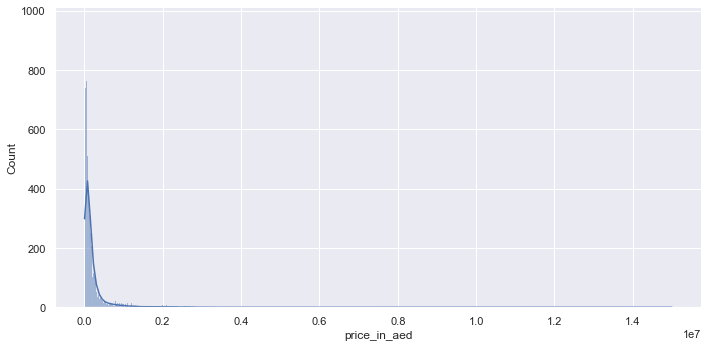

In [15]:
sns.displot(data_no_NaN['price_in_aed'],kde=True,
    height=5,
    aspect=2)
# Видим на графике очевидную аномалию в сторону максимум (8850000 - максимальное значение для цены)

Убираем анамалию по части цены.

In [16]:
q = data_no_NaN['price_in_aed'].quantile(0.99)
#q = 1990000 порог для цены
data1 = data_no_NaN[data_no_NaN['price_in_aed']<q]
data1.describe(include='all')

,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,fuel_type,steering_side,year,company
count,8.109000e+03,8.109000e+03,8109,8109,8109,8109.000000,8109,8109,8109,8109,8109.000000,8109
unique,NaN,NaN,4,5,13,NaN,2,10,4,2,NaN,66
top,NaN,NaN,Perfect inside and out,Perfect inside and out,SUV,NaN,Automatic Transmission,200 - 300 HP,Gasoline,Left Hand Side,NaN,mercedes-benz
freq,NaN,NaN,7793,7979,3612,NaN,7829,2288,8018,8107,NaN,1191
mean,1.767780e+05,1.102424e+05,NaN,NaN,NaN,6.125046,NaN,NaN,NaN,NaN,2015.666667,NaN
std,2.535456e+05,1.278860e+06,NaN,NaN,NaN,1.887800,NaN,NaN,NaN,NaN,4.620769,NaN
min,6.000000e+03,0.000000e+00,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,1953.000000,NaN
25%,4.890000e+04,3.870300e+04,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2014.000000,NaN
50%,9.300000e+04,8.700000e+04,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,2016.000000,NaN
75%,1.850000e+05,1.400000e+05,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,2019.000000,NaN


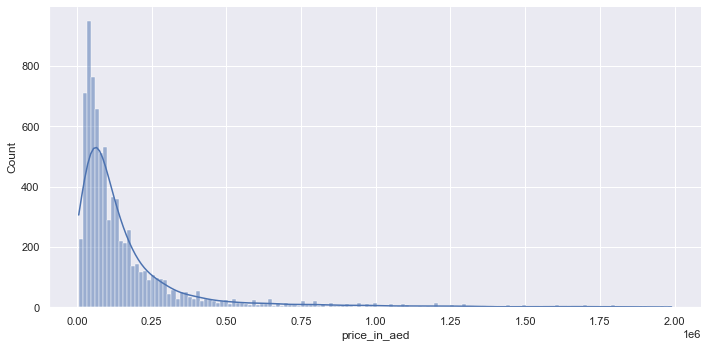

In [17]:
sns.displot(data1['price_in_aed'],kde=True,
    height=5,
    aspect=2)
# график стал лучше, но не так значимо
# не уверен что так нужно осталять

Рассмотрим данные относительно года выпуска автомабилей

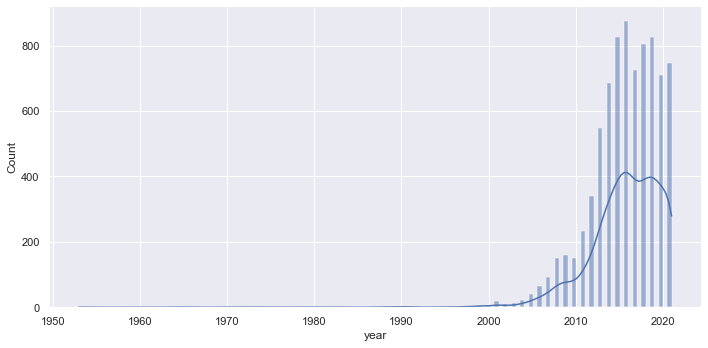

In [18]:
sns.displot(data1['year'],
    height=5,
    aspect=2,
    kde=True)
# Видим на графике очевидную аномалию в сторону минимума (1953 год)

In [19]:
q = data1['year'].quantile(0.01)
#q = 2002 порог для года
data2 = data1[data1['year']>q]

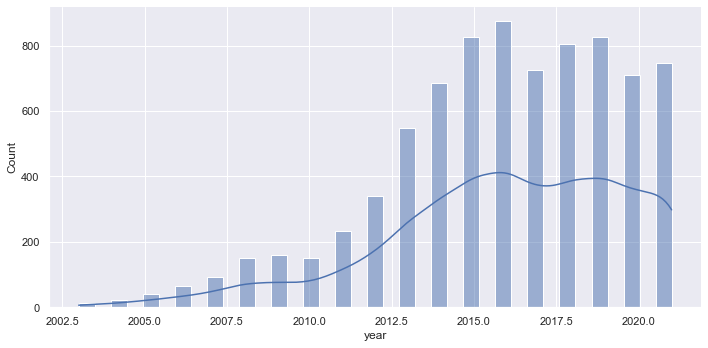

In [20]:
sns.displot(data2['year'],
    height=5,
    aspect=2,
    kde=True)
# график стал лучше

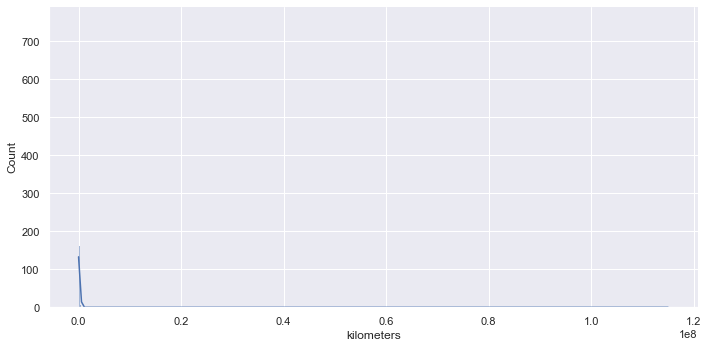

In [21]:
sns.displot(data2['kilometers'],kde=True,
    height=5,
    aspect=2)
# Видим на графике очевидную аномалию в сторону максимум (115000000 - максимальное значение для пробега)

In [22]:
q = data2['kilometers'].quantile(0.99)
#q = 300000 порог для пробега
data3 = data2[data2['kilometers']<q]

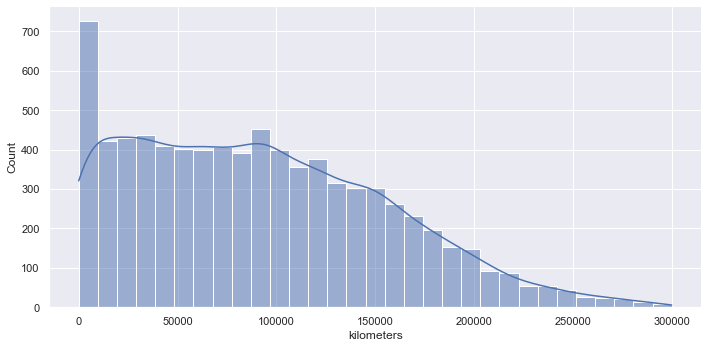

In [23]:
sns.displot(data3['kilometers'],kde=True,
    height=5,
    aspect=2)
# график стал лучше, он стал читаем, в отличии от отображентия выше

Переопределение индексов данных

In [24]:
data_cleaned = data3.reset_index(drop=True)

In [25]:
data_cleaned.describe(include='all')

,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,fuel_type,steering_side,year,company
count,7.941000e+03,7941.000000,7941,7941,7941,7941.000000,7941,7941,7941,7941,7941.000000,7941
unique,NaN,NaN,4,5,13,NaN,2,10,4,1,NaN,66
top,NaN,NaN,Perfect inside and out,Perfect inside and out,SUV,NaN,Automatic Transmission,200 - 300 HP,Gasoline,Left Hand Side,NaN,mercedes-benz
freq,NaN,NaN,7652,7835,3563,NaN,7696,2232,7854,7941,NaN,1169
mean,1.789749e+05,91855.090669,NaN,NaN,NaN,6.119129,NaN,NaN,NaN,NaN,2015.971162,NaN
std,2.552812e+05,64115.409064,NaN,NaN,NaN,1.891160,NaN,NaN,NaN,NaN,3.649892,NaN
min,8.900000e+03,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2003.000000,NaN
25%,4.950000e+04,38000.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2014.000000,NaN
50%,9.500000e+04,85000.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,2016.000000,NaN
75%,1.890000e+05,137000.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,2019.000000,NaN
